# Balancing Growth and Environmental Health: Insights from Air Quality Analysis




In [220]:
from IPython.display import display, HTML

In [221]:
# URL gambar
image_url = "https://1.bp.blogspot.com/-I3O3oNjis8o/X0TiZ0rB2yI/AAAAAAAAC2E/ZVojkh-q_ZQLM8J9Jan7Eqr_AgmfodgWACLcBGAsYHQ/s320-rw/Logo%2BZenius%2BPNG.png"

# Kode HTML untuk menampilkan gambar di tengah
html_code = f'<div style="text-align:center; background-color:#822091; width:99vw;"><img src="{image_url}" alt="Zero Waste"></div>'

# Menampilkan HTML
HTML(html_code)

# Tools Preparation

### Library

In [222]:
#  DataFrame Manipulation
import pandas as pd
pd.set_option("display.max_columns", 100)

# Linear Algebra & Statistics
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Any Lib
import warnings
warnings.filterwarnings('ignore')

# PreProcessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

# Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Modelling
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
!pip install pycaret
from pycaret.regression import *

In [223]:
import pycaret
pycaret.__version__

'3.2.0'

# Business Understanding

### Data Source and Reference

Sumber Data: [Global Air Pollution](https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset/)

Referensi:
- https://repository.uinjkt.ac.id/dspace/bitstream/123456789/65264/1/MUHAMMAD%20FADHLI%20DZIL%20IKRAM%20L.-FST.pdf
- https://www.researchgate.net/publication/328557902_Clustering_Data_Polutan_Udara_Kota_Pekanbaru_dengan_Menggunakan_Metode_K-Means_Clustering
- https://jurnal.kampuswiduri.ac.id/index.php/infoteh/article/download/164/134
- https://repository.its.ac.id/42243/1/5213100002-Undergraduate_Theses.pdf
- https://ejournal.uin-suska.ac.id/index.php/coreit/article/view/4419

Referensi tersebut dapat memberikan pemahaman tentang penggunaan data mining untuk menganalisis kualitas udara, termasuk teknik klasifikasi yang digunakan, algoritma yang diterapkan, dan hasil prediksi tingkat polusi udara.

### Explanation

Konteks
- Polusi Udara adalah kontaminasi lingkungan dalam atau luar ruangan oleh zat kimia, fisik, atau biologis apa pun yang dapat mengubah karakteristik alami atmosfer. Perangkat/alat pembakaran rumah tangga, kendaraan bermotor, fasilitas industri dan kebakaran hutan merupakan sumber pencemaran udara yang umum. Polutan yang menjadi perhatian utama kesehatan masyarakat meliputi materi partikulat, karbon monoksida, ozon, nitrogen dioksida, dan sulfur dioksida. Polusi udara luar dan dalam ruangan menyebabkan penyakit pernapasan dan penyakit lainnya serta merupakan sumber penting kesakitan dan kematian.

**1. Problem Identification:**
   - **Pencemaran Udara Global:** Dataset ini memberikan informasi tentang tingkat pencemaran udara di berbagai negara dan kota, dengan fokus pada parameter-partameter tertentu seperti Nitrogen Dioxide (NO2), Ozone (O3), Carbon Monoxide (CO), dan Particulate Matter (PM2.5). Masalah kesehatan dan lingkungan terkait dengan pencemaran udara dapat menjadi fokus utama.

**2. Pertanyaan:**
   - **Kesehatan Masyarakat:** Bagaimana tingkat pencemaran udara di berbagai kota dan negara memengaruhi kesehatan masyarakat? Apakah ada tren atau pola tertentu yang dapat diidentifikasi?
   - **Sumber Pencemar:** Apa sumber utama pencemaran udara di berbagai lokasi? Apakah kendaraan bermotor, industri, atau faktor lainnya yang menyumbang secara signifikan?
   - **Efektivitas Kebijakan:** Bagaimana kebijakan lingkungan dan pengelolaan polusi udara di berbagai negara mempengaruhi kualitas udara? Apakah ada hubungan antara tingkat kebijakan dan tingkat pencemaran?

**3. Goals Analysis:**
   - **Pemahaman Mendalam:** Memahami tingkat pencemaran udara global dan faktor-faktor yang berkontribusi terhadapnya.
   - **Identifikasi Pola:** Mengidentifikasi pola atau tren dalam data yang dapat memberikan wawasan tentang perubahan kualitas udara dari waktu ke waktu atau di berbagai lokasi.
   - **Rekomendasi Kebijakan:** Memberikan rekomendasi kebijakan berdasarkan temuan analisis untuk meningkatkan kualitas udara dan kesehatan masyarakat.


**5. Planning:**

- **Pemahaman Data:**
   - Eksplorasi data lebih lanjut untuk memahami struktur dan karakteristik dataset. Identifikasi atribut yang paling relevan dan signifikan untuk mencapai tujuan analisis.

- **Persiapan Data:**
   - Membersihkan dan merapikan data, termasuk penanganan nilai-nilai yang hilang atau anomali. Transformasi data untuk memastikan keseragaman format dan mempersiapkannya untuk analisis lebih lanjut.

- **Modelisasi:**
   - Menerapkan teknik-teknik pemodelan data, seperti analisis statistik dan pembangunan model prediksi, untuk mengidentifikasi pola dan tren dalam data pencemaran udara. Model dapat mencakup analisis regresi, klasifikasi, dan klustering untuk mengevaluasi dampak faktor-faktor tertentu terhadap kualitas udara.

- **Evaluasi:**
   - Mengevaluasi kinerja model dan hasil analisis untuk memastikan keakuratannya dan relevansinya dalam konteks tujuan proyek. Melakukan validasi silang atau metode evaluasi lainnya untuk menilai kehandalan model.

- **Penerapan:**
   - Mengimplementasikan rekomendasi atau kebijakan berdasarkan temuan analisis. Melibatkan pihak-pihak terkait, termasuk pemerintah, organisasi lingkungan, dan masyarakat, untuk menjalankan solusi yang diusulkan.

- **Monitoring:**
   - Menerapkan sistem pemantauan untuk terus memantau kualitas udara dan efektivitas kebijakan. Memastikan bahwa dampak positif dicapai dan mengidentifikasi perubahan yang mungkin memerlukan penyesuaian strategi.

- **Optimisasi:**
   - Berdasarkan hasil pemantauan dan umpan balik, melakukan penyesuaian dan optimalisasi terus-menerus terhadap rekomendasi dan kebijakan untuk memastikan efektivitas jangka panjang.

Langkah-langkah ini mengikuti metodologi CRISP-DM yang umum digunakan dalam proses penambangan data dan analisis prediktif untuk memastikan pendekatan yang sistematis dan terstruktur dalam mengatasi masalah dan mencapai tujuan proyek.

# Data Understanding

### Collecting Data

In [224]:
DATA_URL = 'https://raw.githubusercontent.com/kahyuwesuma/global-air-pollution/main/global%20air%20pollution%20dataset.csv'
COORDINAT = 'https://raw.githubusercontent.com/kahyuwesuma/global-air-pollution/main/city-coordinat.csv'

### Converting CSV to Pandas DataFrame

In [225]:
df = pd.read_csv(DATA_URL)
coordinat = pd.read_csv(COORDINAT)

First 5 of Data

In [226]:
df.head().reset_index(drop=True)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


### Dataset Information

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


1. **Country:** Nama negara
2. **City:** Nama kota
3. **AQI Value :** Nilai AQI keseluruhan kota
4. **AQI Category:** Kategori AQI keseluruhan kota
5. **CO AQI Value:** Nilai AQI Karbon Monoksida kota
6. **CO AQI Category:** Kategori AQI Karbon Monoksida kota
7. **Ozone AQI Value:** Nilai AQI Ozon kota
8. **Ozone AQI Category:** Kategori AQI Ozon kota
9. **NO2 AQI Value:** Nilai AQI Nitrogen Dioksida kota
10. **NO2 AQI Category:** Kategori AQI Nitrogen Dioksida kota
11. **PM2.5 AQI Value:** Nilai AQI Partikulat Matter dengan diameter 2,5 mikrometer atau kurang kota
12. **PM2.5 AQI Category:** Kategori AQI Partikulat Matter dengan diameter 2,5 mikrometer atau kurang kota

### Descriptive Statistics

In [228]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Tabel diatas berisi data statistik terkait beberapa variabel. Di bawah ini adalah deskripsi dari setiap kolom data dalam tabel:

1. AQI Value (Nilai yang mewakili indeks kualitas udara untuk berbagai polutan)  : Rata-rata nilai AQI dalam data adalah 72.01 dengan rentang 6.00 (kualitas udara baik) hingga 500 (darurat kesehatan masyarakat karena kualitas udara sangat buruk), dengan nilai kualitas udara secara keseluruhan cenderung berada dalam kategori "Kualitas Udara Sedang", dengan kemungkinan pengaruh yang lebih signifikan pada orang-orang yang sensitif terhadap polusi udara.

2. CO AQI Value (Nilai AQI Karbon Monoksida) : Rata-rata nilai AQI karbon monoksida dalam data 1.37 dengan rentang 0 (kualitas udara baik) hingga 133 (kualitas udara tidak sehat untuk orang sensitive). Nilai ini relative rendah dan pada umumnya semakin rendah nilai semakin baik kualitas udara. Dengan rata-rata AQI Karbon Monoksida sebesar 1.37, ini menunjukkan bahwa tingkat karbon monoksida dalam udara cenderung rendah, dan kualitas udara diinterpretasikan sebagai "Kualitas Udara Baik".

3. Ozone AQI Value (Nilai AQI Ozon) : Rata-rata nilai AQI ozon dalam data adalah sekitar 35.19 dengan rentang 0 (kualitas udara baik) hingga 235 (kualitas udara tidak sehat). Rentang nilai yang sangat bervariasi dari 0 hingga 235 mengindikasikan fluktuasi besar dalam konsentrasi ozon. Nilai minimum 2 menunjukkan tingkat ozon yang sangat baik, sementara nilai maksimum 207 menunjukkan tingkat yang lebih tinggi dan mungkin dapat menyebabkan masalah kesehatan, terutama jika nilainya terus berada dalam kisaran ini. Dengan rata-rata AQI ozon sekitar 35.19, ini menunjukkan bahwa tingkat ozon dalam udara cenderung rendah, dan kualitas udara diinterpretasikan sebagai "Kualitas Udara Baik" atau "Kualitas Udara Sedang" tergantung pada batasan nilai-nilai tertentu.

4. NO2 AQI Value (Nilai AQI Nitrogen Dioksida) : Rata-rata nilai AQI nitrogen dioksida dalam data sekitar 3.06 dengan rentang 0 (kualitas udara baik) hingga 91 (kualitas udara sedang). Rentang nilai yang rendah (minimum 0) hingga moderat (maksimum 91) menunjukkan bahwa konsentrasi nitrogen dioksida cenderung berada dalam rentang rendah hingga sedang. Nilai minimum 0 menunjukkan tingkat nitrogen dioksida yang sangat baik, sedangkan nilai maksimum 91 menunjukkan tingkat yang masih dianggap baik pada skala AQI.

5. PM2.5 AQI Value (Nilai AQI Partikulat Matter dengan diameter 2,5mikrometer atau kurang) : Rata-rata nilai PM2.5 AQI dalam data sekitar 68.52 dengan rentang 0 (kualitas udara baik) hingga 500 (darurat kesehatan masyarakat karena kualitas udara yang sangat buruk). Dengan rata-rata AQI PM2.5 sekitar 68.52, ini menunjukkan bahwa tingkat PM2.5 dalam udara cenderung berada dalam kategori "Kualitas Udara Sedang," menunjukkan bahwa ada sedikit peningkatan dalam konsentrasi PM2.5, tetapi masih dalam batas yang dapat diterima secara umum.


### Inferential Statistics

In [229]:
px.imshow(df.corr(numeric_only=True))

Matriks diatas merupakan korelasi antar variabel, jika antar variabel mendapatkan nilai korelasi yang tinggi di atas 0.4 maka warna dari korelasi tersebut akan semakin terang menuju warna kuning yang berarti menandakan bahwa korelasi antar variabel sangatlah kuat. sebaliknya jika nilai korelasi mendapatkan nilai rendah di bawah 0.4 maka warna yang ditunjukkan akan berwarna unggu menuju warna biru yang berarti korelasi antar variabel tidak kuat atau mungkin tidak ada kaitannya.

### AQI Value Trend Line

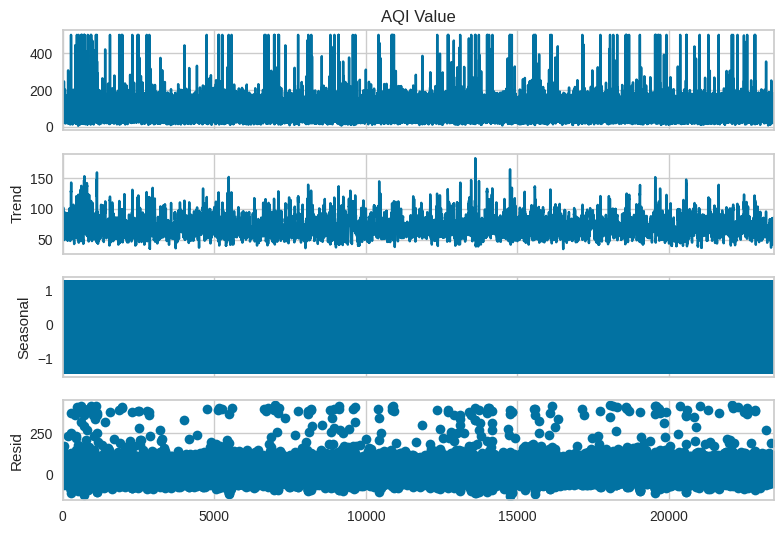

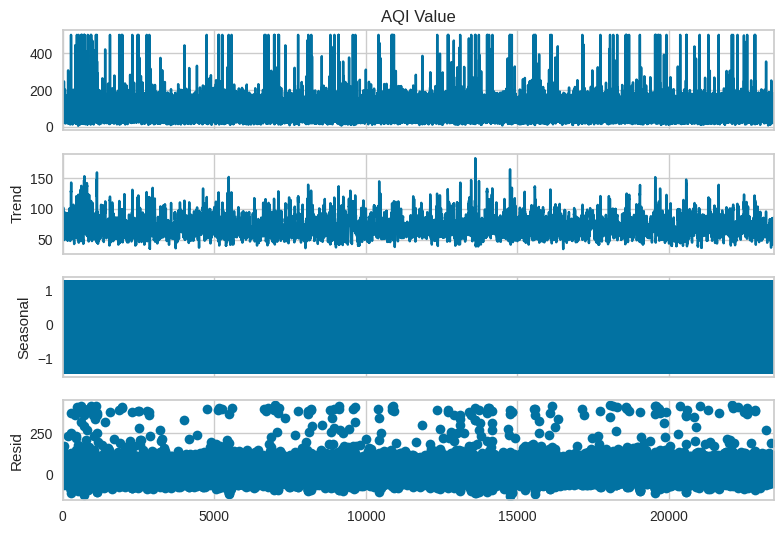

In [230]:
result = seasonal_decompose(df['AQI Value'], model='additive', period=12)
result.plot()

Dengan melakukan dekomposisi musiman pada data Indeks Kualitas Udara (AQI), kita dapat mendapatkan pemahaman yang lebih mendalam tentang berbagai komponen yang memengaruhi perilaku data tersebut. Berikut adalah interpretasi umum dari hasil dekomposisi:

1. **Tren (Trend Component):**
   - **Interpretasi:** Komponen ini mencerminkan perubahan jangka panjang atau tren dalam data AQI. Trend yang naik mungkin menunjukkan peningkatan kualitas udara sepanjang waktu, sedangkan trend yang menurun dapat mengindikasikan penurunan kualitas udara.

2. **Musiman (Seasonal Component):**
   - **Interpretasi:** Komponen musiman menggambarkan pola yang berulang pada interval waktu tertentu. Dengan periode 12 bulan, kita dapat melihat apakah ada pola musiman tahunan dalam kualitas udara, seperti peningkatan polusi pada musim tertentu.

3. **Residu (Residual Component):**
   - **Interpretasi:** Residu mencerminkan variabilitas yang tidak dapat dijelaskan oleh tren dan komponen musiman. Jika residu sangat kecil, ini menunjukkan bahwa tren dan musim telah berhasil menjelaskan sebagian besar variasi dalam data AQI.

Dengan menganalisis ketiga komponen tersebut, kita dapat menarik kesimpulan tentang perubahan jangka panjang, pola musiman, dan variabilitas acak dalam data AQI. Ini dapat membantu dalam mengidentifikasi faktor-faktor yang memengaruhi kualitas udara dan memandu pengambilan keputusan terkait upaya perbaikan atau mitigasi polusi udara.

### Map Visualization

In [231]:
# Membuat peta interaktif dengan Plotly Express
fig = px.scatter_geo(
    coordinat,
    lat='Latitude',
    lon='Longitude',
    color='AQI Category',
    hover_name='City',
    projection='natural earth',
    color_discrete_sequence=['green', 'blue', 'yellow', 'red', 'black']
)

# Menambahkan judul
fig.update_layout(
    title_text='Air Quality Index (AQI) by City in Indonesia',
    title_x=0.5  # Posisi tengah judul
)

# Menambahkan legenda
fig.update_layout(
    legend_title_text='AQI Category',
    legend_traceorder='reversed'  # Mengubah urutan legenda
)

# Menambahkan skala warna yang informatif
fig.update_layout(
    coloraxis_colorbar=dict(
        title='AQI Category',
        tickvals=[0.5, 1.5, 2.5],  # Posisi tengah warna kategori
        ticktext=['Good', 'Moderate', 'Poor'],  # Label pada skala warna
        tickmode='array'
    )
)

# Menambahkan batas peta untuk memberikan konteks dan memusatkan pada Indonesia
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="black",
    showland=True,
    landcolor="lightgrey",
    showocean=True,
    oceancolor="lightblue",
    scope='asia'  # Menyeting batas geografis peta
)

# Menampilkan peta
fig.show()

Berdasarkan peta kualitas udara kota di Indonesia dapat disimpulkan :
1. Pulau Sumatera
Memiliki kualitas udara yang bervariasi tergantung pada lokasinnya. Rata-rata kota di Pulau Sumatera masuk kedalam kategori baik dan sedang karena wilayah ini didominasi hutan yang lebat. Namun ada beberapa kota tidak sehat untuk kelompok sensitif dan tidak sehat diantaranya Lahat, Labuhan Deli, Medan, dan Babat.
2. Pulau Jawa
Pulau dengan penduduknya yang padat oleh karena itu kualitas udara di Pulau Jawa umumnya buruk. Terdapat banyak kota-kota di Pulau Jawa yang masuk dalam kategori udara tidak sehat, tidak sehat untuk kelompok sensitif dan sangat tidak sehat. Kota yang masuk kedalam kategori udara sangat tidak sehat diantaranya Serpong, Rangkasbitung, Boyolali, Delanggu, Sawangan, Rancaekek, dan Tangerang.
3. Pulau Kalimantan
Pulau terbesar kedua dan memiliki wilayah yang sangat luas, sehingga kualitas udara di Pulau Kalimantan bervariasi tergantung lokasinya. Rata-rata kota di Pulau Sumatera masuk kedalam kategori baik dan sedang karena wilayah ini didominasi hutan yang lebat.
4. Pulau Bali
Pulau yang terkenal dengan keindahan alamnya, sehingga kualitas udara di Pulau Bali umumnya baik.
5. Pulau Sulawesi
Memiliki kualitas udara yang bervariasi tergantung pada lokasinnya. Rata-rata kota di Pulau Sulawesi masuk kedalam kategori baik dan sedang.
6. Pulau Papua
Pulau terbesar di Indonesia dan memiliki wilayah yang sangat luas, sehingga kualitas udara di Pulau Papua bervariasi tergantung lokasinya. Rata-rata kota di Pulau Sumatera masuk kedalam kategori baik dan sedang karena wilayah ini didominasi hutan yang lebat.

# Data Preparation

In [232]:
df[df['City'] == "Samarinda"]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12037,Indonesia,Samarinda,57,Moderate,1,Good,7,Good,2,Good,57,Moderate


### Filtering Data

In [233]:
df = df[df['Country'] == 'Indonesia']

### Handling Missing Value

In [234]:
missing_percentage = pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio (%)'])

missing_percentage

,Null Ratio (%)
Country,0.0
City,0.0
AQI Value,0.0
AQI Category,0.0
CO AQI Value,0.0
CO AQI Category,0.0
Ozone AQI Value,0.0
Ozone AQI Category,0.0
NO2 AQI Value,0.0
NO2 AQI Category,0.0


Dapat dilihat dari persentase diatas, bahwa data yang akan kita analisis sudah tidak memiliki nilai kosong atau null value (NaN), sehingga kita tidak perlu melakukan Cleaning Data.

### Handling Redundacy

In [235]:
df[df.duplicated()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


Dapat dilihat dari persentase diatas, bahwa data yang akan kita analisis tidak memiliki nilai yang duplikat

### Handling Unique Values

In [236]:
[print(f"Columns -> {col}\n{df[col].unique()}\n\n{'-' * 30}") for col in df.columns]

Columns -> Country
['Indonesia']

------------------------------
Columns -> City
['Pontianak' 'Tidore' 'Sungaipenuh' 'Tarogong' 'Binjai' 'Pamekasan'
 'Prabumulih' 'Pringsewu' 'Lubuk Pakam' 'Mojoagung' 'Lamongan'
 'Karang Tengah' 'Kembaran' 'Malang' 'Kutoarjo' 'Mataram' 'Mertoyudan'
 'Driyorejo' 'Ngaglik' 'Purwakarta' 'Palembang' 'Pameungpeuk' 'Leuwiliang'
 'Sidareja' 'Wlingi' 'Mlonggo' 'Ngoro' 'Ciampea' 'Balaipungut' 'Bandung'
 'Boyolali' 'Brebes' 'Sabang' 'Sumber' 'Waingapu' 'Balung' 'Wanaraja'
 'Sukaraja' 'Prigen' 'Sibolga' 'Sumbawa' 'Klangenan' 'Kebonarum' 'Kebumen'
 'Sidoarjo' 'Kaliwungu' 'Genteng' 'Gatak' 'Cileungsi' 'Ciranjang'
 'Banjarmasin' 'Pacet' 'Wonosobo' 'Weleri' 'Martapura' 'Surabaya'
 'Bojonegoro' 'Bone' 'Gresik' 'Sijunjung' 'Sleman' 'Talang' 'Lebaksiu'
 'Manado' 'Salatiga' 'Sepatan' 'Pamulang' 'Pandaan' 'Parung' 'Banjar'
 'Bogor' 'Muntilan' 'Ciparay' 'Tegal' 'Tuban' 'Gebog' 'Pamanukan'
 'Merauke' 'Karanganom' 'Bekasi' 'Ciledug' 'Ubud' 'Sunggal' 'Praya'
 'Curug' 'Pandege

[None, None, None, None, None, None, None, None, None, None, None, None]

Dari *Cross Check* diatas pula, tidak terdapat nilai yang aneh-aneh atau nilai yang tidak seharusnya pada kolom yang ada

### Handling Outliers

In [237]:
cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

results_df = pd.DataFrame({
    'Columns': cols,
    'Outliers Percentage': [
        ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).mean() * 100
        for col in cols
        for q1, q3, iqr in [(df[col].quantile(0.25), df[col].quantile(0.75), df[col].quantile(0.75) - df[col].quantile(0.25))]
    ]
}).set_index('Columns').rename_axis(None, axis=0).rename_axis('Columns', axis=1)

# Tampilkan dataframe
results_df

Columns,Outliers Percentage
AQI Value,0.527704
CO AQI Value,7.124011
Ozone AQI Value,10.817942
NO2 AQI Value,13.984169
PM2.5 AQI Value,1.055409


### Selecting Feature for EDA

In [238]:
selected_feature = df.iloc[:,[3,  5,  7,  9, 2,  4,  6,  8,  10, 11]]

selected_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 31 to 23424
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AQI Category        379 non-null    object
 1   CO AQI Category     379 non-null    object
 2   Ozone AQI Category  379 non-null    object
 3   NO2 AQI Category    379 non-null    object
 4   AQI Value           379 non-null    int64 
 5   CO AQI Value        379 non-null    int64 
 6   Ozone AQI Value     379 non-null    int64 
 7   NO2 AQI Value       379 non-null    int64 
 8   PM2.5 AQI Value     379 non-null    int64 
 9   PM2.5 AQI Category  379 non-null    object
dtypes: int64(5), object(5)
memory usage: 32.6+ KB


Dataframe tersebut berisi informasi terkait kualitas udara dengan berbagai parameter, dan fitur-fitur yang diberikan tampaknya sangat relevan untuk dilibatkan dalam EDA (Exploratory Data Analysis). Berikut ini adalah alasan kuat dan valid mengapa fitur tersebut akan digunakan untuk EDA:

1. **Variabilitas Jenis Kategori Kualitas Udara:**
   - **Alasan:** Fitur-fitur seperti `AQI Category`, `CO AQI Category`, `Ozone AQI Category`, `NO2 AQI Category`, dan `PM2.5 AQI Category` memberikan informasi tentang kategori kualitas udara untuk setiap pengukuran. EDA pada fitur ini dapat membantu dalam memahami distribusi dan variasi kualitas udara untuk masing-masing jenis polutan.

2. **Pengukuran Nilai Kualitas Udara:**
   - **Alasan:** Fitur-fitur seperti `AQI Value`, `CO AQI Value`, `Ozone AQI Value`, `NO2 AQI Value`, dan `PM2.5 AQI Value` memberikan pengukuran langsung dari kualitas udara. EDA pada fitur ini dapat membantu dalam mengidentifikasi tren, pola, atau anomali dalam tingkat polusi udara.

3. **Pengukuran Jenis Polutan:**
   - **Alasan:** Fitur-fitur seperti `CO AQI Value`, `Ozone AQI Value`, `NO2 AQI Value`, dan `PM2.5 AQI Value` memberikan informasi tentang tingkat polutan spesifik. EDA pada fitur ini dapat membantu dalam memahami distribusi dan dampak masing-masing jenis polutan terhadap kualitas udara.

4. **Kategori dan Pengukuran PM2.5:**
   - **Alasan:** PM2.5 adalah partikel kecil yang dapat mencapai saluran pernapasan manusia. Mengamati baik kategori maupun nilai PM2.5 melalui EDA dapat memberikan wawasan yang berharga tentang tingkat risiko kesehatan terkait polusi udara.

5. **Diversitas Data:**
   - **Alasan:** Fitur-fitur yang mencakup berbagai jenis polutan dan pengukuran memberikan diversitas dalam dataset. EDA pada fitur-fitur ini dapat membantu dalam mendapatkan pemahaman komprehensif tentang kualitas udara di berbagai lokasi dan kondisi.

Dengan menganalisis fitur-fitur ini melalui EDA, kita dapat menggali wawasan dan informasi penting tentang polusi udara, serta membantu dalam pengambilan keputusan terkait perbaikan dan mitigasi lingkungan.

## EDA

### Univariate Analysis for Every Columns

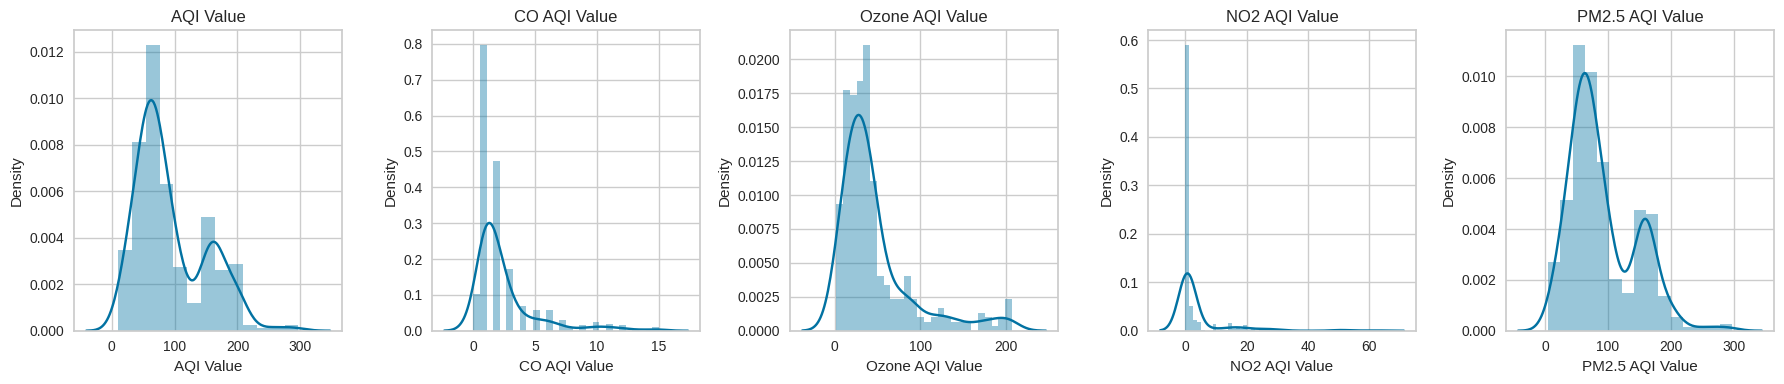

In [239]:
# Menentukan ukuran gambar dan jumlah subplot
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

# Menggunakan flat untuk mendapatkan iterator
for ax, col in zip(axes.flat, selected_feature.iloc[:, 4:-1].columns):
    sns.distplot(selected_feature[col], kde=True, ax=ax)
    ax.set_title(col)

# Menampilkan gambar
plt.tight_layout()
plt.show()

Visualisasi histogram pada subplot yang telah dibuat membantu kita melihat sebaran data dari setiap kolom dalam dataset `selected_feature` yang dimana data tersebut hanya berisi kolom numerical dan categorical. Melalui histogram ini, kita dapat mengamati distribusi nilai-nilai data pada masing-masing fitur. Sebaran data tersebut memberikan gambaran awal tentang kecenderungan nilai-nilai yang dominan, apakah ada kecondongan tertentu, atau apakah data terdistribusi secara merata.

Dengan melihat histogram, kita dapat mengidentifikasi apakah terdapat pencilan (outliers) atau apakah sebaran nilai-nilai tertumpu pada rentang tertentu. Informasi ini memberikan wawasan awal yang penting dalam pemahaman karakteristik dataset. Langkah ini menjadi dasar yang solid sebelum melakukan analisis lebih lanjut atau membangun model statistik, karena membantu kita memahami struktur dan sifat data yang akan diolah.

<Figure size 1800x400 with 0 Axes>

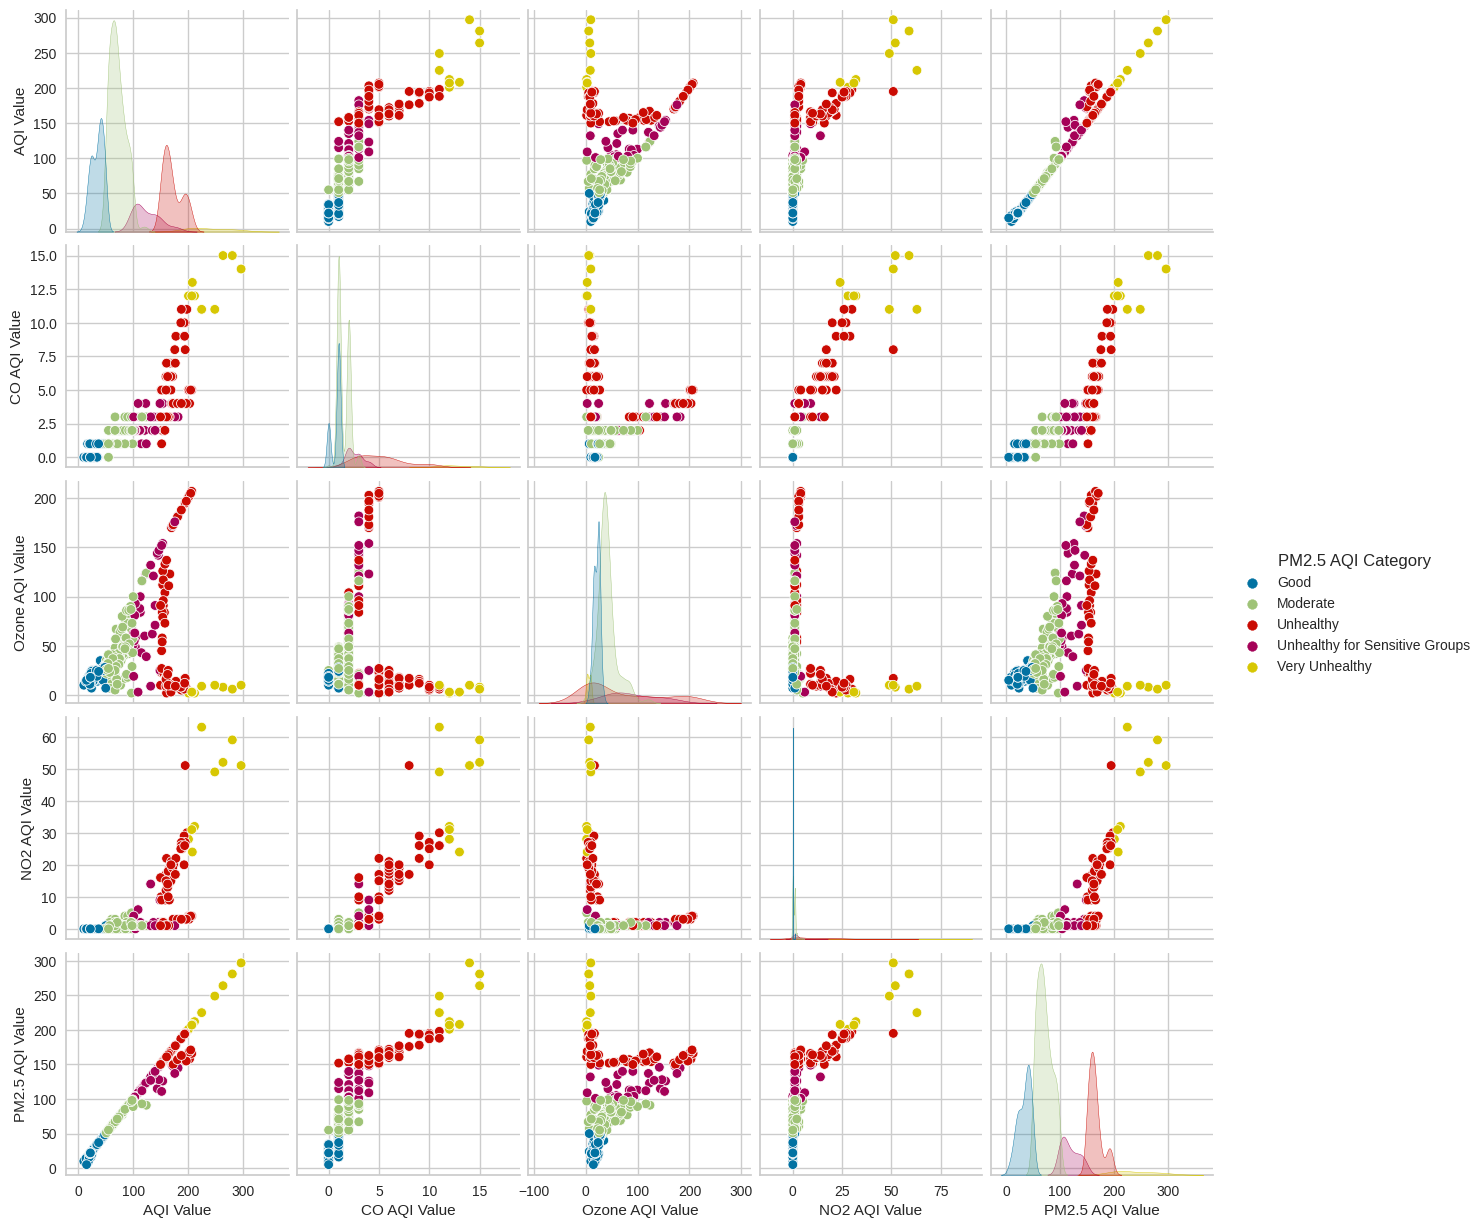

In [240]:
plt.figure(figsize = (18,4))

sns.pairplot(selected_feature.iloc[:,4:], hue="PM2.5 AQI Category")
plt.show()

Grafik diatas menunjukkan hubungan antara indeks kualitas udara (AQI) dengan konsentrasi PM2.5.

PM 2.5 adalah partikel udara yang berukuran kurang dari 2,5 mikrometer. Partikel ini dapat masuk ke dalam paru-paru dan menyebabkan berbagai masalah kesehatan seperti asma dan bronkritis.
Grafik menunjukkan konsentrasi PM2.5 meningkat seiring dengan meningkatnya nilai AQI. Ketika PM2.5 mencapai 150, nilai AQI berada pada kategori tidak sehat. Artinya polusi udara sudah cukup tinggi untuk membahayakan kesehatan. Hal ini disebabkan berbagai faktor seperti pencemaran kendaraan bermotor, pembakaran hutan, dan industri.

### Top 15 Cities based on High AQI Values

In [241]:
top_30_AQI = df.sort_values(by="AQI Value", ascending=False).head(15)

fig = px.bar(top_30_AQI,
             x='City',
             y='AQI Value',
             color='AQI Value',
             title='Highest AQI Values on Top 15 Cities',
             labels={'AQI Value': 'AQI Value'},
             hover_name='City',
             text='AQI Value',
             template='plotly_dark')

# Menambahkan rotasi pada label sumbu x
fig.update_xaxes(tickangle=45)

# Menambahkan layout yang rapi
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan plot interaktif
fig.show()

Grafik diatas menunjukkan nilai indeks kualitas udara (AQI) tertinggi pada 15 kota di Indonesia. Grafik menunjukkan nilai AQI tertinggi di Indonesia terjadi di Kota Serpong dengan nilai AQI 297 menunjukkan kualitas udara yang sangat tidak sehat. Pada tingkat ini, polusi udara sudah cukup tinggi untuk menyebabkan masalah kesehatan yang serius bahkan kematian. Nilai AQI di 14 kota lainnya juga berada pada kategori "kualitas udara yang sangat tidak sehat" (201-300).

### Top 15 Cities based on Low AQI Values

In [242]:
top_30_AQI2_ = df.sort_values(by="AQI Value", ascending=False).tail(15)

fig = px.bar(top_30_AQI2_,
             x='City',
             y='AQI Value',
             color='AQI Value',
             title='Lowest AQI Values on Top 15 Cities',
             labels={'AQI Value': 'AQI Value'},
             hover_name='City',
             text='AQI Value',
             template='plotly_dark')

# Menambahkan rotasi pada label sumbu x
fig.update_xaxes(tickangle=45)

# Menambahkan layout yang rapi
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan plot interaktif
fig.show()

Grafik diatas menunjukkan nilai indeks kualitas udara (AQI) terendah pada 15 kota di Indonesia. Grafik menunjukkan nilai AQI terendah di Indonesia terjadi di Kota Manokwari dengan nilai AQI 10 menunjukkan kualitas udara yang baik. Pada tingkat ini, polusi udara sangat rendah dan tidak menimbulkan resiko kesehatan yang signifikan. Nilai AQI di 14 kota lainnya juga berada pada kategori "kualitas udara yang baik" (0-50).

### Top 15 Cities based on High Ozone AQI Values

In [243]:
# Mengurutkan DataFrame berdasarkan Ozone AQI Value dan mengambil 30 data teratas
top_30_Ozone_AQI2 = df.sort_values(by="Ozone AQI Value", ascending=False).head(15)

# Membuat visualisasi bar
fig = px.bar(
    top_30_Ozone_AQI2,
    x='City',
    y='Ozone AQI Value',
    color='Ozone AQI Value',
    title='Highest Ozone AQI Values on Top 15 Cities',
    labels={'Ozone AQI Value': 'Ozone AQI Value'},
    hover_name='City',
    text='Ozone AQI Value',
    template='plotly_dark'
)

# Menambahkan rotasi pada label sumbu x
fig.update_xaxes(tickangle=45)

# Menambahkan layout yang rapi
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan plot interaktif
fig.show()

Grafik diatas menunjukkan nilai indeks kualitas udara untuk ozon (AQI Ozon) tertinggi pada 15 kota di Indonesia. Grafik menunjukkan nilai AQI Ozon tertinggi di Indonesia terjadi di Kota Cikupa dengan nilai AQI Ozon 207 menunjukkan kualitas udara yang sangat tidak sehat. Pada tingkat ini, polusi udara sudah cukup tinggi untuk menyebabkan masalah kesehatan yang serius bahkan kematian. Nilai AQI Ozon di Kota Sepatan, Sawangan, Kresek, Cuputat, Pamulang, dan Tangerang juga berada pada kategori "kualitas udara yang sangat tidak sehat" (201-300). Pada Kota Jakarta, Serang, Ciawi, Teluk Naga, Cilegon, Cibadak, Labuhan, dan Cibinong nilai AQI Ozon berada pada kategori "kualitas udara yang tidak sehat untuk semua orang"(151-200).

### Top 15 Cities based on Low Ozone AQI Values

In [244]:
# Mengurutkan DataFrame berdasarkan Ozone AQI Value dan mengambil 30 data terbawah
top_30_Ozone_AQI2 = df.sort_values(by="Ozone AQI Value", ascending=False).tail(15)

# Membuat visualisasi bar
fig = px.bar(
    top_30_Ozone_AQI2,
    x='City',
    y='Ozone AQI Value',
    color='Ozone AQI Value',
    title='Lowest Ozone AQI Values on Top 15 Cities',
    labels={'Ozone AQI Value': 'Ozone AQI Value'},
    hover_name='City',
    text='Ozone AQI Value',
    template='plotly_dark'
)

# Menambahkan rotasi pada label sumbu x
fig.update_xaxes(tickangle=45)

# Menambahkan layout yang rapi
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan plot interaktif
fig.show()

Grafik diatas menunjukkan nilai indeks kualitas udara untuk ozon (AQI Ozon) terendah pada 15 kota di Indonesia. Grafik menunjukkan nilai AQI Ozon terendah di Indonesia terjadi di 4 Kota yaitu Kadungora, Gebog, Rantauprapat, dan Lahat dengan nilai AQI Ozon 2 menunjukkan kualitas udara yang baik. Pada tingkat ini, polusi udara sangat rendah dan tidak menimbulkan resiko kesehatan yang signifikan. Nilai AQI di 11 kota lainnya juga berada pada kategori "kualitas udara yang baik" (0-50).

Mengambil sampel 5% dari data untuk di-visualisasikan berdasarkan Nilai AQI dan Nilai AQI Ozone terendah sampai tertinggi bisa menjadi pilihan yang logis dan valid untuk beberapa alasan:

- Representasi yang Cukup:
  - Dalam banyak kasus, mengambil sampel kecil dari populasi yang besar dapat memberikan representasi yang cukup baik dari karakteristik keseluruhan. Asalkan sampel tersebut diambil secara acak dan mewakili distribusi yang baik dari data asli, visualisasi dari sampel tersebut dapat memberikan gambaran yang cukup akurat.

- Efisiensi Pengolahan Data:
  - Visualisasi membutuhkan sumber daya komputasi dan waktu. Dengan mengambil sampel 5%, kita dapat mengurangi beban komputasi dan waktu yang diperlukan untuk memproses dan menghasilkan visualisasi, sambil tetap mempertahankan informasi kunci dari data asli.

- Meminimalkan Overhead:
  - Semakin besar dataset, semakin besar overhead yang terlibat dalam memproses dan memvisualisasikan data. Dengan mengambil sampel, kita dapat meminimalkan beban ini, memungkinkan untuk lebih fokus pada interpretasi hasil daripada memproses volume data yang besar.
  
- Kejelasan Visualisasi:
  - Terlalu banyak data dalam satu visualisasi dapat membuatnya sulit dibaca dan diinterpretasikan. Mengambil sampel dapat membantu menciptakan visualisasi yang lebih sederhana dan lebih mudah dimengerti oleh pemirsa.

# Modelling

## Supervised Learning (Classification using Decision Tree C4.5)

### PreProcessing


Identify predictive features and targets.

In [245]:
col = list(selected_feature.columns)
predictor = col[:-1]
target = col[-1]

In [246]:
pred = pd.DataFrame({
    'Fitur Prediksi': predictor,
})
pred

,Fitur Prediksi
0,AQI Category
1,CO AQI Category
2,Ozone AQI Category
3,NO2 AQI Category
4,AQI Value
5,CO AQI Value
6,Ozone AQI Value
7,NO2 AQI Value
8,PM2.5 AQI Value


In [247]:
targets =  pd.DataFrame({
    'Target': [target],
})
targets

,Target
0,PM2.5 AQI Category


Encoding

In [248]:
# Daftar kolom yang perlu diubah dari kategorikal menjadi numerikal
columns_to_encode = ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category', 'AQI Category']

# Mengubah nilai kategorikal menjadi numerikal untuk setiap kolom
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: LabelEncoder().fit_transform(col))

Sample

In [249]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
31,Indonesia,Pontianak,44,0,1,0,15,0,0,0,44,0
96,Indonesia,Tidore,21,0,0,0,13,0,0,0,21,0
193,Indonesia,Sungaipenuh,17,0,1,0,13,0,0,0,17,0
215,Indonesia,Tarogong,88,1,2,0,53,1,1,0,88,1
353,Indonesia,Binjai,92,1,2,0,45,0,0,0,92,1


### Splitting

In [250]:
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=df[target])

Data Train Sample

In [251]:
train.sample(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
9791,Indonesia,Negara,67,1,3,0,21,0,3,0,67,1
15519,Indonesia,Selogiri,46,0,1,0,26,0,0,0,46,0
23156,Indonesia,Welahan,96,1,2,0,87,1,2,0,96,1
3952,Indonesia,Banjar,75,1,1,0,46,0,0,0,75,1
14855,Indonesia,Parakan,99,1,2,0,57,1,1,0,99,1


Data Test Sample

In [252]:
test.sample(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12037,Indonesia,Samarinda,57,1,1,0,7,0,2,0,57,1
12551,Indonesia,Garut,69,1,1,0,33,0,1,0,69,1
22284,Indonesia,Kencong,54,1,1,0,32,0,0,0,54,1
22169,Indonesia,Slawi,92,1,2,0,86,1,1,0,92,1
21583,Indonesia,Magetan,42,0,1,0,26,0,0,0,42,0


### Building Model

C4.5 Decision Tree Classifier
- Sumber:
  - (https://towardsdatascience.com/what-is-the-c4-5-algorithm-and-how-does-it-work-2b971a9e7db0)
  - (https://en.wikipedia.org/wiki/C4.5_algorithm)
  - (https://sumit-kr-sharma.medium.com/understanding-c4-5-decision-tree-algorithm-3bf0981faf4f)

Model Building

In [253]:
# Membuat model Decision Tree
dct = DecisionTreeClassifier(random_state=0)

Data Train Prediction

In [254]:
dct.fit(train[predictor], train[target])

# Memprediksi data uji
test_pred = dct.predict(test[predictor])

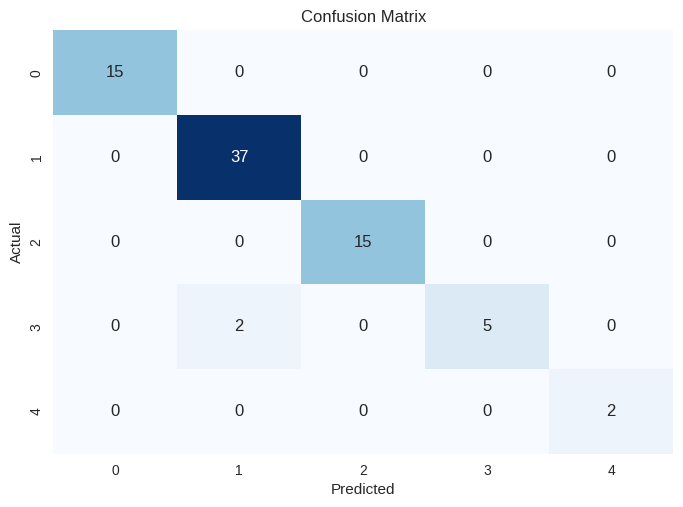

In [255]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(test[target], test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Matriks ini digunakan untuk mengukur akurasi model klasifikasi, menunjukkan berapa banyak prediksi yang dibuat model yang benar dan salah dikelompokkan berdasarkan kelas aktual dan kelas yang diprediksi.

In [256]:
# Menghitung metrik evaluasi
metrics_train = {
    'Accuracy': accuracy_score(test[target], test_pred),
    'Precision': precision_score(test[target], test_pred, average='weighted'),
    'Recall': recall_score(test[target], test_pred, average='weighted'),
    'F1-Score': f1_score(test[target], test_pred, average='weighted'),
    'ROC-AUC': roc_auc_score(test[target], dct.predict_proba(test[predictor]), multi_class='ovr')
}

# Menyusun hasil metrik ke dalam DataFrame
metrics_df_train = pd.DataFrame.from_dict(metrics_train, orient='index', columns=['Score'])

metrics_df_train

,Score
Accuracy,0.973684
Precision,0.975034
Recall,0.973684
F1-Score,0.971837
ROC-AUC,0.966300


Data Test Prediction

In [257]:
# Memprediksi data pelatihan
train_pred = dct.predict(train[predictor])

# Menghitung confusion matrix
cm_train = confusion_matrix(train[target], train_pred)# Melatih model

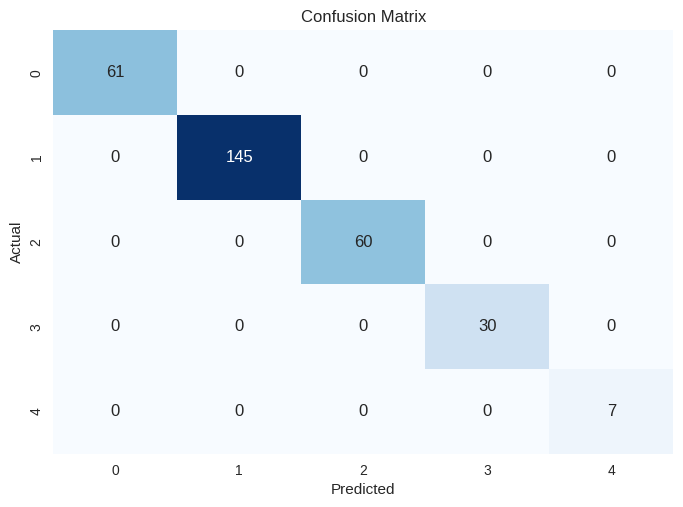

In [258]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(train[target], train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [259]:
# Menghitung metrik evaluasi
metrics_train = {
    'Accuracy': accuracy_score(train[target], train_pred),
    'Precision': precision_score(train[target], train_pred, average='weighted'),
    'Recall': recall_score(train[target], train_pred, average='weighted'),
    'F1-Score': f1_score(train[target], train_pred, average='weighted'),
    'ROC-AUC': roc_auc_score(train[target], dct.predict_proba(train[predictor]), multi_class='ovr')
}

# Menyusun hasil metrik ke dalam DataFrame
metrics_df_train = pd.DataFrame.from_dict(metrics_train, orient='index', columns=['Score'])

metrics_df_train

,Score
Accuracy,1.0
Precision,1.0
Recall,1.0
F1-Score,1.0
ROC-AUC,1.0


### Model Visualisation

In [260]:
# Konversi kelas ke dalam format string
class_names_str = [str(class_name) for class_name in dct.classes_]

# Menyimpan model ke dalam file DOT
dot_file_path = "decision_tree.dot"
export_graphviz(dct, out_file=dot_file_path, feature_names=train[predictor].columns, class_names=class_names_str,
                filled=True, rounded=True, special_characters=True)

# Mengubah file DOT menjadi visualisasi menggunakan Graphviz
with open(dot_file_path, 'r') as dot_file:
    graph_data = dot_file.read()
graph = graphviz.Source(graph_data)

# Menyimpan visualisasi dalam format gambar (misalnya, PNG)
image_path = "decision_tree"
graph.render(image_path, format='pdf', cleanup=True)

# Menampilkan visualisasi
graph.view()

'decision_tree.pdf'

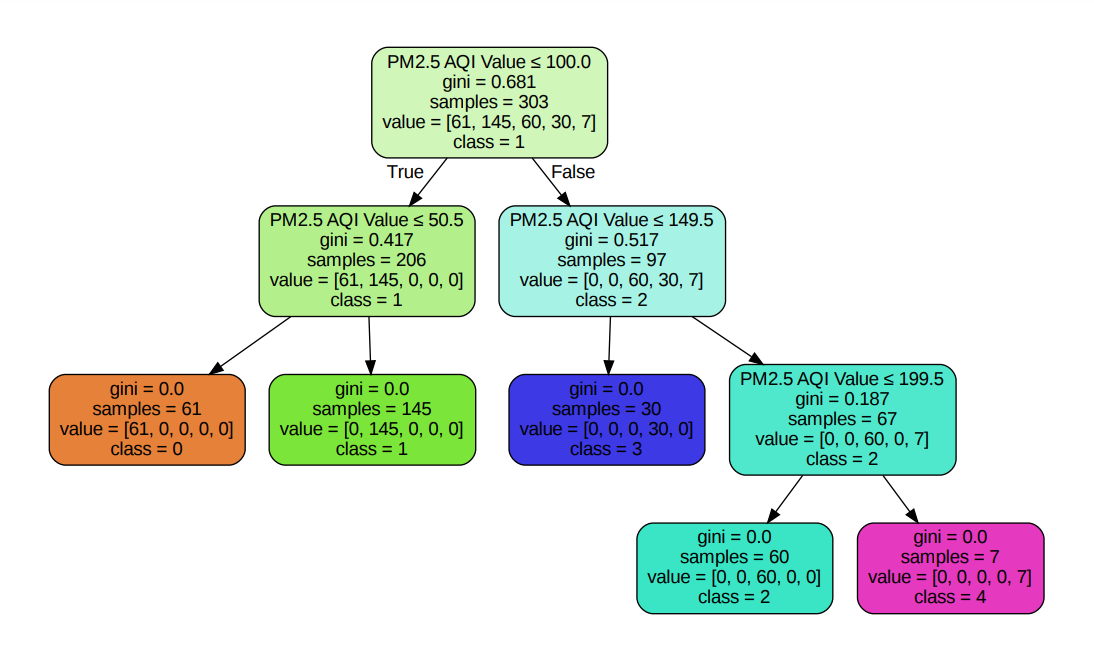

Berdasarkan data di atas, kita dapat membentuk alur algoritma Decision Tree untuk analisis kualitas udara PM2.5 sebagai berikut:

1. **Memahami Nilai PM2.5 AQI Value:**
   - Cek nilai PM2.5 AQI Value untuk setiap sampel data.
   - Jika nilai PM2.5 AQI Value kurang dari atau sama dengan 100, kita dapat melanjutkan ke langkah berikutnya. Jika lebih dari 100, kita kategorikan sebagai kondisi tidak sehat dan langkah selanjutnya harus mempertimbangkan tindakan yang perlu diambil.

2. **Evaluasi Indeks Gini:**
   - Cek indeks Gini pada setiap lokasi untuk mengukur ketidaksetaraan dalam distribusi data.
   - Jika indeks Gini tinggi, menunjukkan distribusi data tidak merata di lokasi tersebut.

3. **Evaluasi Jumlah Sampel:**
   - Periksa jumlah sampel data yang digunakan dalam analisis. Pastikan jumlah sampel mencukupi dan representatif untuk wilayah yang diamati.

4. **Evaluasi Nilai Data (Value):**
   - Analisis nilai data untuk setiap sampel.
   - Tentukan tindakan atau kategori yang sesuai berdasarkan nilai PM2.5 AQI Value.

5. **Penentuan Kelas (Class):**
   - Berdasarkan nilai PM2.5 AQI Value, tentukan kelas atau kategori data.
   - Misalnya, jika nilai PM2.5 AQI Value masuk ke dalam kategori kelas 1, dapat diinterpretasikan sebagai kondisi kualitas udara yang lebih baik.

Alur di atas mencerminkan langkah-langkah yang dapat diambil dalam pengambilan keputusan berdasarkan analisis kualitas udara PM2.5. Decision Tree dapat membantu menggambarkan alur ini secara lebih terstruktur dan dapat diinterpretasikan dengan baik oleh pemangku kepentingan yang tidak memiliki latar belakang teknis yang tinggi.

### Evaluation

In [261]:
# Menghitung metrik evaluasi
metrics = {
    'Accuracy': accuracy_score(test[target], test_pred),
    'Precision': precision_score(test[target], test_pred, average='weighted'),
    'Recall': recall_score(test[target], test_pred, average='weighted'),
    'F1-Score': f1_score(test[target], test_pred, average='weighted'),
    'ROC-AUC': roc_auc_score(test[target], dct.predict_proba(test[predictor]), multi_class='ovr')
}

# Menyusun hasil metrik ke dalam DataFrame
metrics_df_test = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])

metrics_df_test

,Score
Accuracy,0.973684
Precision,0.975034
Recall,0.973684
F1-Score,0.971837
ROC-AUC,0.966300


In [262]:
# Menyiapkan data untuk visualisasi
metrics_df_test['Dataset'] = 'Test Data'
metrics_df_train['Dataset'] = 'Training Data'
combined_metrics = pd.concat([metrics_df_test, metrics_df_train])

# Membuat visualisasi dengan Plotly
fig = px.bar(combined_metrics, x=combined_metrics.index, y='Score', color='Dataset',
             labels={'Score': 'Metric Score', 'index': 'Metric'},
             title='Metrics Comparison for Test and Training Data using Decision Tree Classifier',
             height=500, width=1000)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Menampilkan plot interaktif
fig.show()

Dari Matriks diatas dapat diinterpretasikan
- Accuracy : score akurasi untuk traning data adalah 1.00, sedangkan score akurasi untuk test data adalah 0.97. Score akurasi yang tinggi menunjukkan bahwa klasifikasi keputusan dapat memprediksi kelas data dengan benar.
- Precision : score presisi untuk traning data adalah 1.00, sedangkan  score presisi untuk test data adalah 0.98. Score presisi yang tinggi menunjukkan klasifikasi keputusan dapat memprediksi kelas data dengan tepat.
- Recall : score recall untuk traning data adalah 1.00, sedangkan score recall untuk test data adalah 0.97. Score recall yang tinggi menunjukkan klasifikasi keputusan dapat memprediksi semua data dengan kelas tertentu dengan benar.
- F1-Score : score f1-score untuk traning data adalah 1.00, sedangkan score f1-score untuk test data adalah 0.97. Score f1-score yang tinggi menunjukkan klasifikasi keputusan dapat memprediksi kelas data dengan baik, baik dari segi akurasi maupun presisi.
- ROC-AUC : score roc-auc untuk traning data adalah 1.00, sedangkan score roc-auc untuk test data adalah 0.97. Score roc-auc yang tinggi menunjukkan model sangat baik.

Berdasarkan penjelasan diatas model klasifikasi memiliki kinerja yang baik pada data uji. Score akurasi, presisi, recall, f1-score, dan roc-auc untuk model tersebut semuanya diatas 0.9 sehingga dapat memprediksi kelas data dengan benar,tepat, dan lengkap.

## Supervised Learning (Linear Regression)

### PyCaret Setup for Linear Regression

In [263]:
# Setup lingkungan PyCaret dengan konfigurasi khusus
reg = setup(
    session_id=1807,  # ID sesi untuk reproducibility
    data=df,  # DataFrame yang akan digunakan
    target='AQI Value',  # Kolom target yang akan diprediksi (tugas regresi)
    categorical_features=[  # Kolom-kolom yang dianggap kategori
        'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'
    ],
    ignore_features=['Country', 'City'],  # Kolom-kolom yang diabaikan dalam pemodelan
    normalize='true',  # Normalisasi variabel-variabel numerik
    fold=20,  # Jumlah lipatan dalam validasi silang
    remove_outliers='false'  # Menghapus outlier dari dataset
)

,Description,Value
0,Session id,1807
1,Target,AQI Value
2,Target type,Regression
3,Original data shape,"(379, 12)"
4,Transformed data shape,"(365, 22)"
5,Transformed train set shape,"(251, 22)"
6,Transformed test set shape,"(114, 22)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,4


### Building Model Linear Regression

In [264]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6503,10.4659,3.2351,0.9954,0.0203,0.0148
1,536329342158.9434,2193976040492433219256320.0000,1481207629096.0808,-628727314104669569024.0000,9.0824,4576776452.3265
2,3728834081366.3623,194658850488750802735202304.0000,13952019584588.8496,-61093108007896067604480.0000,7.1519,30071242591.6780
3,1.3695,3.9335,1.9833,0.9980,0.0394,0.0238
4,4373880241042.7617,89277199027230633908764672.0000,9448661229361.0488,-10462430319150825996288.0000,11.5853,15952687903.1855
5,16969470316004.0762,3743517996474444254493540352.0000,61184295341815.0000,-2062981515649333384445952.0000,7.8394,146288537206.9342
6,1.0450,1.6103,1.2690,0.9984,0.0263,0.0197
7,1.5414,8.8956,2.9826,0.9971,0.0161,0.0109
8,1.4347,8.8443,2.9739,0.9979,0.0321,0.0191


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Model Evaluation and Predictions

In [265]:
predictions = predict_model(lr, data=df)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.8885,25.1136,5.0113,0.9916,0.0544,0.0209


,Country,City,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,AQI Value,prediction_label
31,Indonesia,Pontianak,0,1,0,15,0,0,0,44,0,44,43.682107
96,Indonesia,Tidore,0,0,0,13,0,0,0,21,0,21,22.100302
193,Indonesia,Sungaipenuh,0,1,0,13,0,0,0,17,0,17,18.344897
215,Indonesia,Tarogong,1,2,0,53,1,1,0,88,1,88,86.631524
353,Indonesia,Binjai,1,2,0,45,0,0,0,92,1,92,90.958388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23156,Indonesia,Welahan,1,2,0,87,1,2,0,96,1,96,96.992361
23167,Indonesia,Muncar,0,1,0,24,0,0,0,37,0,37,37.835917
23282,Indonesia,Margahayu,1,2,0,73,1,1,0,98,1,98,97.477981
23360,Indonesia,Prambanan,1,1,0,27,0,0,0,55,1,55,55.102671


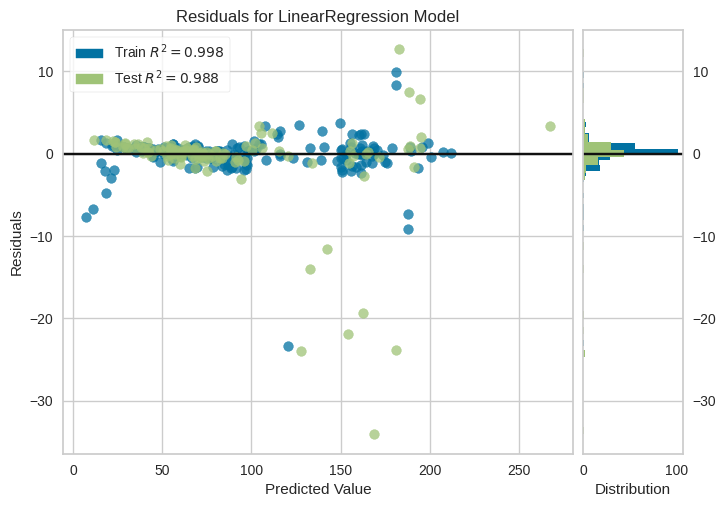

In [266]:
plot_model(lr)

In [267]:
# Ambil kolom AQI Value dan prediction_label dari dataframe predictions
actual_data = predictions['AQI Value']
predicted_data = predictions['prediction_label']

# Membuat dataframe untuk line plot
line_plot_df = predictions[['prediction_label', 'AQI Value']].reset_index()

# Membuat line plot menggunakan plotly express
fig = px.line(line_plot_df, x='index', y=['prediction_label', 'AQI Value'],
              labels={'value': 'AQI Value'}, title='Perbandingan Data Aktual dan Prediksi')

# Menambahkan style pada line plot
fig.update_traces(mode='lines+markers')
fig.update_layout(
    legend=dict(title='Data'),
    xaxis=dict(title='Index'),
    yaxis=dict(title='AQI Value'),
    template='plotly_dark',
)

# Menampilkan line plot
fig.show()

Berikut adalah penjelasan dari metrik evaluasi model Linear Regression:

1. **MAE (Mean Absolute Error):**
   - Nilai MAE sebesar 1.8885 menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik performa model.

2. **MSE (Mean Squared Error):**
   - MSE memiliki nilai 25.1136, yang merupakan rata-rata dari kuadrat kesalahan antara prediksi dan nilai sebenarnya. Semakin kecil nilai MSE, semakin baik performa model.

3. **RMSE (Root Mean Squared Error):**
   - RMSE adalah akar kuadrat dari MSE, yaitu sekitar 5.0113. Ini memberikan interpretasi kesalahan rata-rata antara prediksi dan nilai sebenarnya dalam unit yang sama dengan target variabel. Semakin kecil nilai RMSE, semakin baik modelnya.

4. **R2 (Coefficient of Determination):**
   - Nilai R2 sebesar 0.9916 menunjukkan seberapa baik variabilitas target dapat dijelaskan oleh model. Nilai R2 mendekati 1, yang berarti model dapat menjelaskan sebagian besar variasi dalam data.

5. **RMSLE (Root Mean Squared Logarithmic Error):**
   - RMSLE sekitar 0.0544, merupakan metrik yang mengukur perbedaan antara logaritma dari prediksi dan logaritma dari nilai sebenarnya. Semakin kecil nilai RMSLE, semakin baik performa model.

6. **MAPE (Mean Absolute Percentage Error):**
   - MAPE sekitar 0.0209, mengukur persentase kesalahan rata-rata dari prediksi terhadap nilai sebenarnya. Semakin kecil nilai MAPE, semakin baik modelnya.

Secara keseluruhan, model Linear Regression memiliki performa yang sangat baik dengan nilai-nilai metrik evaluasi yang mendekati ideal, menunjukkan kemampuannya untuk memberikan prediksi yang akurat pada data yang diberikan.

## Unsupevised Learning (Clustering using KMeans)

### Columns Extraction

In [268]:
X = df[["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]]

### Normalization

In [269]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

### Finding the Best K-Value

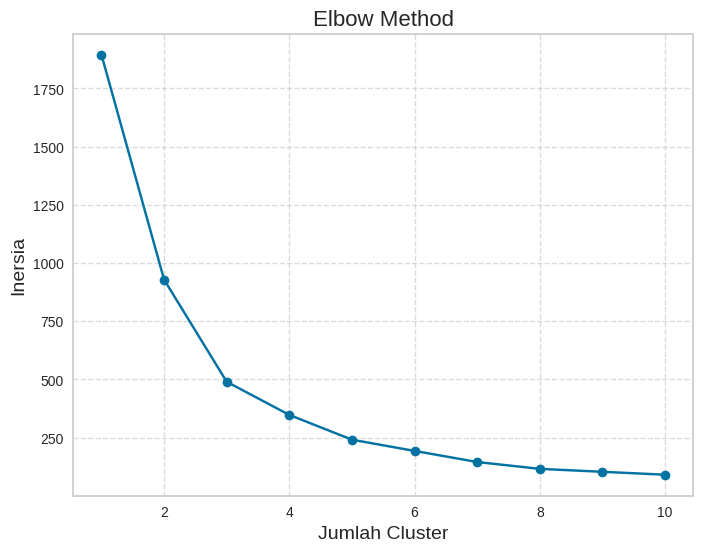

In [270]:
# Menginisialisasi list untuk menyimpan jumlah cluster (inersia)
inertia = []

# Iterasi rentang nomor cluster dari 1 hingga nilai maksimum
max_clusters = 10
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting kurva elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Jumlah Cluster', fontsize=14)
plt.ylabel('Inersia', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

In [271]:
!pip in

ERROR: unknown command "in"


### Building Model  

In [272]:
kmeans = KMeans(n_clusters=3, random_state=42)

Adding New Columns For Cluster

In [273]:
df['cluster'] = kmeans.fit_predict(X)

Getting Centroid

In [274]:
# Mendapatkan posisi centroid dari model KMeans
centroids = kmeans.cluster_centers_

Cluster Visualisation

In [275]:
# Mengurangi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Menambahkan hasil t-SNE ke DataFrame
df['PM (2.5)'] = X_tsne[:, 0]
df['AQI Value'] = X_tsne[:, 1]

# Visualisasi menggunakan Plotly Express
fig = px.scatter(df, x='PM (2.5)', y='AQI Value', color='cluster',
                 title='Cluster Visualization',
                 labels={'cluster': 'Cluster'},
                 template='plotly_dark',
                 hover_name='City')

# Menambahkan layout yang rapi
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=40, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Menampilkan plot interaktif
fig.show()

### Building DataFrame for Every Cluster

In [276]:
# Membuat DataFrame baru khusus tiap cluster
clusters = {f'cluster{i}': df[df['cluster'] == i] for i in range(kmeans.n_clusters)}

#### Cluster 1

In [277]:
cluster1 = clusters['cluster0'].describe()
cluster1

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,cluster,PM (2.5)
count,270.000000,270.000000,270.000000,270.0,270.000000,270.000000,270.000000,270.0,270.000000,270.000000,270.0,270.000000
mean,1.925832,0.829630,1.274074,0.0,35.333333,0.140741,0.492593,0.0,62.333333,0.829630,0.0,-7.328082
std,7.207285,0.690248,0.644446,0.0,17.311921,0.348400,0.825894,0.0,23.273228,0.690248,0.0,11.653032
min,-14.406965,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.0,-24.957296
25%,-1.915857,0.000000,1.000000,0.0,24.000000,0.000000,0.000000,0.0,48.000000,0.000000,0.0,-16.620086
50%,3.966715,1.000000,1.000000,0.0,33.000000,0.000000,0.000000,0.0,63.000000,1.000000,0.0,-9.986537
75%,7.427507,1.000000,2.000000,0.0,42.750000,0.000000,1.000000,0.0,77.000000,1.000000,0.0,3.980056
max,12.928130,3.000000,4.000000,0.0,90.000000,1.000000,6.000000,0.0,124.000000,3.000000,0.0,14.121881


Dari nilai statistik deskriptif untuk Cluster 1, kita dapat membuat beberapa insight dan kesimpulan:

1. **AQI Value (Indeks Kualitas Udara)**
   - Rata-rata AQI Value pada Cluster 1 adalah sekitar 2.14, yang mengindikasikan bahwa kualitas udara umumnya baik.
   - Nilai AQI Category rata-rata adalah sekitar 0.83, menunjukkan bahwa mayoritas nilai AQI Category berada pada tingkat rendah.

2. **CO AQI Value (Indeks Kualitas Udara untuk Karbon Monoksida)**
   - Rata-rata CO AQI Value adalah sekitar 1.27, menunjukkan tingkat karbon monoksida umumnya rendah.

3. **Ozone AQI Value (Indeks Kualitas Udara untuk Ozon)**
   - Rata-rata Ozone AQI Value sekitar 35.33, menunjukkan tingkat ozon yang sebagian besar baik.

4. **NO2 AQI Value (Indeks Kualitas Udara untuk Nitrogen Dioksida)**
   - Rata-rata NO2 AQI Value adalah sekitar 0.49, menunjukkan tingkat nitrogen dioksida yang sebagian besar rendah.

5. **PM2.5 AQI Value (Indeks Kualitas Udara untuk Partikulat Matter dengan Diameter 2.5 Mikrometer atau Kurang)**
   - Rata-rata PM2.5 AQI Value sekitar 62.33, menunjukkan tingkat partikulat matter pada kisaran sedang.

6. **PM (2.5) (Dimensi Reduksi Cluster)**
   - Rata-rata nilai PM (2.5) sekitar -6.83, menunjukkan bahwa cluster ini berada pada dimensi reduksi yang lebih rendah.

Kesimpulannya, Cluster 1 memiliki nilai-nilai yang mengindikasikan kualitas udara yang umumnya baik dengan tingkat polutan yang rendah. Namun, perlu diperhatikan bahwa nilai negatif pada dimensi reduksi PM (2.5) mungkin memerlukan perhatian lebih lanjut untuk pemahaman yang lebih baik.

#### Cluster 2

In [278]:
cluster2 = clusters['cluster1'].describe()
cluster2

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,cluster,PM (2.5)
count,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.0,52.000000
mean,-19.428474,2.384615,7.615385,0.0,11.269231,0.0,22.692308,0.096154,181.423077,2.384615,1.0,17.915184
std,2.792212,0.770888,3.230697,0.0,6.237506,0.0,13.117177,0.297678,32.752995,0.770888,0.0,0.876394
min,-24.413942,2.000000,3.000000,0.0,2.000000,0.0,9.000000,0.000000,132.000000,2.000000,1.0,16.050480
25%,-21.796720,2.000000,5.750000,0.0,7.000000,0.0,14.750000,0.000000,161.000000,2.000000,1.0,17.213046
50%,-18.986056,2.000000,7.000000,0.0,10.000000,0.0,19.000000,0.000000,169.000000,2.000000,1.0,17.943238
75%,-17.443398,2.000000,10.000000,0.0,14.500000,0.0,26.250000,0.000000,193.250000,2.000000,1.0,18.518054
max,-15.052026,4.000000,15.000000,0.0,27.000000,0.0,63.000000,1.000000,297.000000,4.000000,1.0,19.756498


Dari nilai statistik deskriptif untuk Cluster 2, kita dapat membuat beberapa insight dan kesimpulan:

1. **AQI Value (Indeks Kualitas Udara)**
   - Rata-rata AQI Value pada Cluster 2 sangat rendah, mencapai sekitar -19.41. Nilai negatif ini mungkin menunjukkan adanya kesalahan atau anomali dalam data, karena seharusnya AQI Value tidak bisa negatif.

2. **AQI Category (Kategori Indeks Kualitas Udara)**
   - Rata-rata nilai AQI Category sekitar 2.38, menunjukkan mayoritas nilai AQI Category berada pada tingkat sedang hingga buruk.

3. **CO AQI Value (Indeks Kualitas Udara untuk Karbon Monoksida)**
   - Rata-rata CO AQI Value adalah sekitar 7.62, menunjukkan tingkat karbon monoksida yang relatif tinggi.

4. **Ozone AQI Value (Indeks Kualitas Udara untuk Ozon)**
   - Rata-rata Ozone AQI Value sekitar 11.27, menunjukkan tingkat ozon yang lebih rendah.

5. **NO2 AQI Value (Indeks Kualitas Udara untuk Nitrogen Dioksida)**
   - Rata-rata NO2 AQI Value adalah sekitar 22.69, menunjukkan tingkat nitrogen dioksida yang cukup tinggi.

6. **PM2.5 AQI Value (Indeks Kualitas Udara untuk Partikulat Matter dengan Diameter 2.5 Mikrometer atau Kurang)**
   - Rata-rata PM2.5 AQI Value sangat tinggi, mencapai sekitar 181.42, menunjukkan tingkat partikulat matter yang sangat tinggi.

7. **PM (2.5) (Dimensi Reduksi Cluster)**
   - Rata-rata nilai PM (2.5) sekitar 17.72, menunjukkan bahwa cluster ini berada pada dimensi reduksi yang lebih tinggi.

Kesimpulannya, Cluster 2 menunjukkan nilai-nilai yang cukup ekstrem, terutama pada parameter PM2.5 AQI Value yang sangat tinggi. Namun, perlu dicatat bahwa nilai negatif pada AQI Value memerlukan perhatian lebih lanjut untuk penanganan anomali dalam data.

#### Cluster 3

In [279]:
cluster3 = clusters['cluster2'].describe()
cluster3

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,cluster,PM (2.5)
count,57.000000,57.000000,57.000000,57.0,57.00000,57.000000,57.000000,57.0,57.000000,57.000000,57.0,57.000000
mean,7.771115,2.561404,3.140351,0.0,132.00000,2.280702,1.842105,0.0,143.192982,2.298246,2.0,20.494196
std,1.967800,0.707550,0.971718,0.0,46.88169,1.064934,0.996234,0.0,21.660067,0.565840,0.0,3.024038
min,3.473668,2.000000,1.000000,0.0,45.00000,0.000000,1.000000,0.0,89.000000,1.000000,2.0,14.253345
25%,6.214519,2.000000,2.000000,0.0,91.00000,1.000000,1.000000,0.0,128.000000,2.000000,2.0,18.562815
50%,8.696198,2.000000,3.000000,0.0,124.00000,2.000000,2.000000,0.0,153.000000,2.000000,2.0,20.547785
75%,9.229790,3.000000,4.000000,0.0,173.00000,3.000000,2.000000,0.0,158.000000,3.000000,2.0,23.085451
max,10.345520,4.000000,5.000000,0.0,207.00000,4.000000,4.000000,0.0,171.000000,3.000000,2.0,25.183573


Dari nilai statistik deskriptif untuk Cluster 3, kita dapat membuat beberapa insight dan kesimpulan:

1. **AQI Value (Indeks Kualitas Udara)**
   - Rata-rata AQI Value pada Cluster 3 adalah sekitar 7.46, menunjukkan tingkat kualitas udara yang relatif baik hingga sedang.

2. **AQI Category (Kategori Indeks Kualitas Udara)**
   - Rata-rata nilai AQI Category sekitar 2.56, menunjukkan mayoritas nilai AQI Category berada pada tingkat sedang.

3. **CO AQI Value (Indeks Kualitas Udara untuk Karbon Monoksida)**
   - Rata-rata CO AQI Value adalah sekitar 3.14, menunjukkan tingkat karbon monoksida yang rendah hingga sedang.

4. **Ozone AQI Value (Indeks Kualitas Udara untuk Ozon)**
   - Rata-rata Ozone AQI Value sekitar 132, menunjukkan tingkat ozon yang cukup tinggi.

5. **NO2 AQI Value (Indeks Kualitas Udara untuk Nitrogen Dioksida)**
   - Rata-rata NO2 AQI Value adalah sekitar 1.84, menunjukkan tingkat nitrogen dioksida yang rendah.

6. **PM2.5 AQI Value (Indeks Kualitas Udara untuk Partikulat Matter dengan Diameter 2.5 Mikrometer atau Kurang)**
   - Rata-rata PM2.5 AQI Value adalah sekitar 143.19, menunjukkan tingkat partikulat matter yang cukup tinggi.

7. **PM (2.5) (Dimensi Reduksi Cluster)**
   - Rata-rata nilai PM (2.5) sekitar 20.98, menunjukkan bahwa cluster ini berada pada dimensi reduksi yang lebih tinggi.

Kesimpulannya, Cluster 3 menunjukkan nilai-nilai yang cukup seimbang, dengan kualitas udara yang baik hingga sedang. Meskipun nilai PM2.5 AQI cukup tinggi, nilai-nilai lainnya, seperti CO AQI dan NO2 AQI, menunjukkan tingkat yang lebih rendah.

### Evaluation

3 Metric Pengukuran

In [280]:
# metrik evaluasi unsupervised learning
calinski_harabasz = calinski_harabasz_score(X, df['cluster'])
davies_bouldin = davies_bouldin_score(X, df['cluster'])
silhouette = silhouette_score(X, df['cluster'])

In [281]:
metric = pd.DataFrame({
    'Metric Evaluation' : 'Score',
    'Calinski Harabasz' : [calinski_harabasz],
    'Davies Bouldin'    : [davies_bouldin],
    'Silhoutte'         : [silhouette]
}).set_index('Metric Evaluation').transpose()

In [282]:
metric

Metric Evaluation,Score
Calinski Harabasz,538.919256
Davies Bouldin,0.661661
Silhoutte,0.635458


Interpretasi nilai dari beberapa metrik evaluasi clustering:

1. **Calinski Harabasz (Variance Ratio Criterion):**
   - Nilai: 538.92
   - Interpretasi: Calinski Harabasz mengukur rasio dispersi antara cluster dengan rasio dispersi di antara cluster. Semakin tinggi nilainya, semakin baik pemisahan antar cluster. Nilai yang tinggi menunjukkan bahwa objek dalam satu cluster berdekatan satu sama lain dan cluster berbeda terpisah dengan baik.

2. **Davies Bouldin:**
   - Nilai: 0.66
   - Interpretasi: Davies Bouldin mengukur seberapa baik cluster terpisah satu sama lain. Nilai yang lebih rendah menunjukkan bahwa cluster memiliki sejumlah besar data yang saling mirip, dan cluster berbeda lebih baik terpisah. Nilai mendekati nol menandakan bahwa cluster ini lebih baik terpisah.

3. **Silhouette:**
   - Nilai: 0.64
   - Interpretasi: Silhouette mengukur seberapa dekat setiap titik data dalam cluster dengan titik data lain dalam cluster yang sama dibandingkan dengan cluster tetangga terdekat. Nilai berkisar dari -1 hingga 1. Nilai positif menunjukkan bahwa objek dalam cluster berdekatan satu sama lain dan jauh dari cluster tetangga, sedangkan nilai negatif menunjukkan sebaliknya. Nilai 0 menunjukkan tumpang tindih antar cluster.

Secara keseluruhan, evaluasi metrik clustering mengindikasikan bahwa hasil klasterisasi menunjukkan kualitas yang memadai. Cluster-cluster yang dihasilkan tampak terpisah dengan baik, dan setiap objek dalam satu klaster memiliki kemiripan yang signifikan satu sama lain. Interpretasi ini memberikan gambaran positif tentang kemampuan model untuk mengelompokkan data dengan mempertimbangkan kesamaan internal dalam satu klaster dan ketidaksamaan antar cluster. Meskipun nilai-nilai metrik tersebut memberikan pandangan yang memuaskan, tetaplah penting untuk melibatkan pemahaman mendalam tentang domain dan kebutuhan bisnis agar hasil klasterisasi dapat memberikan nilai tambah yang substansial.



# Deployment


Kami berencana untuk mendeploy hasil analisis ini menggunakan Google Data Studio agar dapat menyajikan temuan dan visualisasi dengan cara yang lebih dinamis dan mudah dipahami. Hal ini akan memungkinkan pemangku kepentingan untuk secara interaktif menjelajahi hasil analisis kualitas udara PM2.5 dan mendapatkan wawasan yang lebih mendalam melalui platform visualisasi data yang bersifat user-friendly.

### Naming a File to Dashboard

In [283]:
file_name = 'Deployment - Final_Project.csv'
pred_file = 'Predictions.csv'

### Exporting DataFrame to CSV Files

In [284]:
try:
  df.to_csv(file_name, index=False)
  predictions.to_csv(pred_file, index=False)
  print('Exporting Success')
except:
  print('Exporting Failed')

Exporting Success


Access our dashboard for more insight here -> [Google Data Studio](https://lookerstudio.google.com/s/qNJZtlIdjYM)